# Pokémon Stats EDA
This notebook performs exploratory data analysis on the cleaned Pokémon dataset.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/clean/pokemon_clean.csv')
df.head()

,id,name,type1,type2,height,weight,hp,attack,defense,special_attack,special_defense,speed,total_stats,is_legendary
0,1,Bulbasaur,grass,poison,7,69,45,49,49,65,65,45,318,False
1,2,Ivysaur,grass,poison,10,130,60,62,63,80,80,60,405,False
2,3,Venusaur,grass,poison,20,1000,80,82,83,100,100,80,525,False
3,4,Charmander,fire,NaN,6,85,39,52,43,60,50,65,309,False
4,5,Charmeleon,fire,NaN,11,190,58,64,58,80,65,80,405,False


## Summary Statistics

In [15]:
df.describe()

,id,height,weight,hp,attack,defense,special_attack,special_defense,speed,total_stats
count,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,512.987305,12.111328,667.980469,70.169922,77.465820,72.451172,70.090820,70.196289,67.227539,427.601562
std,296.180691,12.486838,1211.820632,26.640036,29.742801,29.246042,29.671195,26.650586,28.700939,112.792777
min,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000
25%,256.750000,5.000000,85.000000,50.000000,55.000000,50.000000,47.000000,50.000000,45.000000,324.500000
50%,512.500000,10.000000,280.000000,68.000000,75.000000,70.000000,65.000000,66.500000,65.000000,450.000000
75%,769.250000,15.000000,700.000000,85.000000,100.000000,90.000000,90.000000,86.000000,88.250000,508.000000
max,1025.000000,200.000000,9999.000000,255.000000,181.000000,230.000000,173.000000,230.000000,200.000000,720.000000


## Distribution of Total Stats

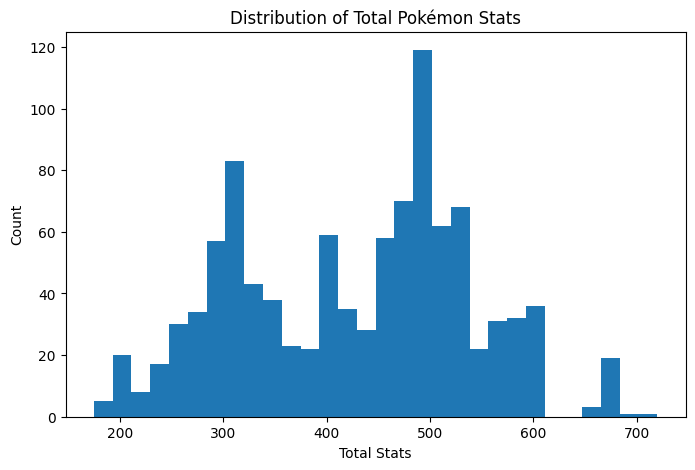

In [16]:
plt.figure(figsize=(8,5))
plt.hist(df['total_stats'], bins=30)
plt.xlabel("Total Stats")
plt.ylabel("Count")
plt.title("Distribution of Total Pokémon Stats")
plt.savefig('../data/histogram.png', dpi=300, bbox_inches='tight')
plt.show()

## Average Stats by Primary Type

In [17]:
type_means = df.groupby('type1')[['hp','attack','defense','special_attack','special_defense','speed','total_stats']].mean()
type_means

,hp,attack,defense,special_attack,special_defense,speed,total_stats
type1,,,,,,,
bug,56.493976,67.554217,69.578313,56.433735,63.313253,61.265060,374.638554
dark,75.800000,88.000000,71.622222,72.933333,70.755556,75.622222,454.733333
dragon,79.594595,98.972973,75.216216,78.486486,77.702703,80.189189,490.162162
electric,64.779661,72.966102,62.101695,84.830508,66.559322,85.067797,436.305085
fairy,71.379310,66.827586,70.965517,76.103448,85.793103,65.000000,436.068966
fighting,76.075000,102.700000,72.350000,53.175000,67.275000,69.975000,441.550000
fire,69.833333,82.606061,66.833333,83.272727,69.545455,74.106061,446.196970
flying,70.000000,79.888889,66.000000,68.444444,68.777778,83.000000,436.111111
ghost,61.800000,68.600000,75.485714,84.114286,80.828571,60.342857,431.171429


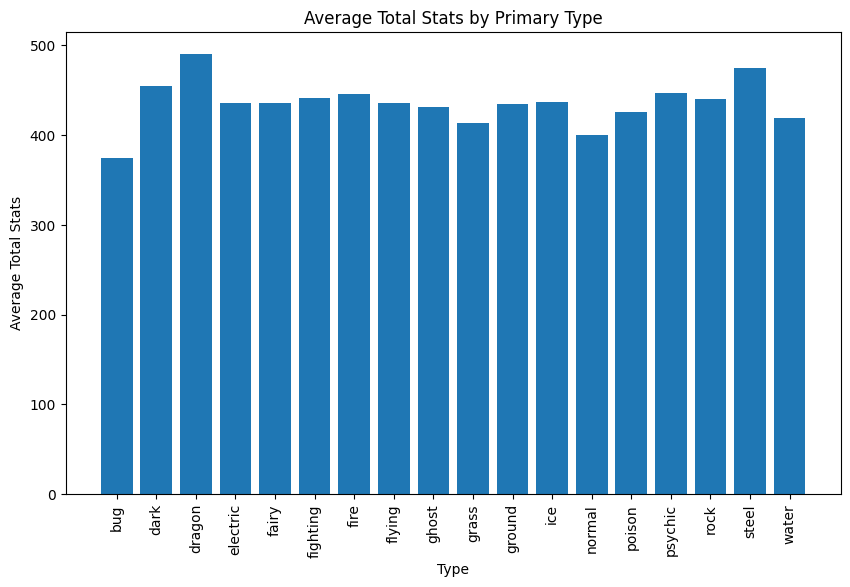

In [18]:
plt.figure(figsize=(10,6))
plt.bar(type_means.index, type_means['total_stats'])
plt.xticks(rotation=90)
plt.xlabel("Type")
plt.ylabel("Average Total Stats")
plt.title("Average Total Stats by Primary Type")
plt.savefig('../data/PrimaryType.png', dpi=300, bbox_inches='tight')
plt.show()

## Correlation Heatmap

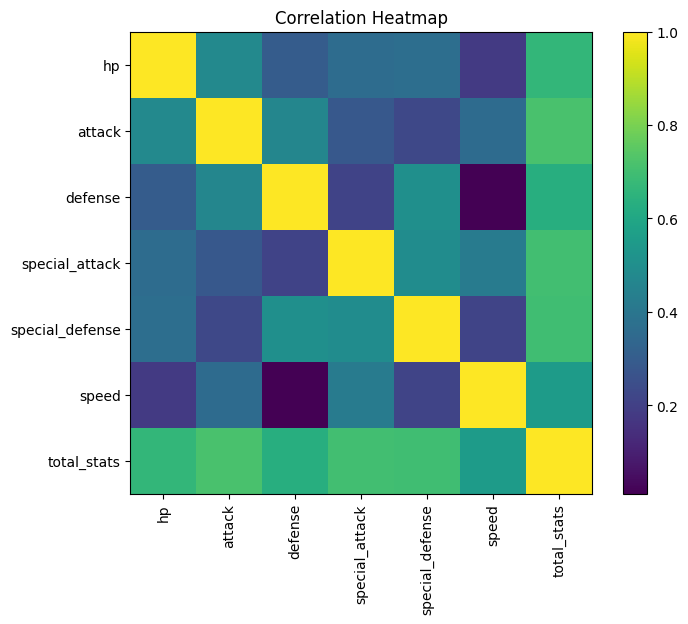

,hp,attack,defense,special_attack,special_defense,speed,total_stats
hp,1.000000,0.476031,0.298553,0.359875,0.368968,0.180894,0.667002
attack,0.476031,1.000000,0.463579,0.283053,0.225858,0.354847,0.714446
defense,0.298553,0.463579,1.000000,0.211169,0.503558,0.010898,0.629350
special_attack,0.359875,0.283053,0.211169,1.000000,0.493217,0.423133,0.701656
special_defense,0.368968,0.225858,0.503558,0.493217,1.000000,0.214874,0.697971
speed,0.180894,0.354847,0.010898,0.423133,0.214874,1.000000,0.555658
total_stats,0.667002,0.714446,0.629350,0.701656,0.697971,0.555658,1.000000


In [19]:
import numpy as np

plt.figure(figsize=(8,6))
corr = df[['hp','attack','defense','special_attack','special_defense','speed','total_stats']].corr()
plt.imshow(corr, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.savefig('../data/heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
corr

## Legendary vs Non-Legendary Comparison

In [20]:
legendary_means = df.groupby('is_legendary')['total_stats'].mean()
legendary_means

is_legendary
False    410.989247
True     591.957447
Name: total_stats, dtype: float64

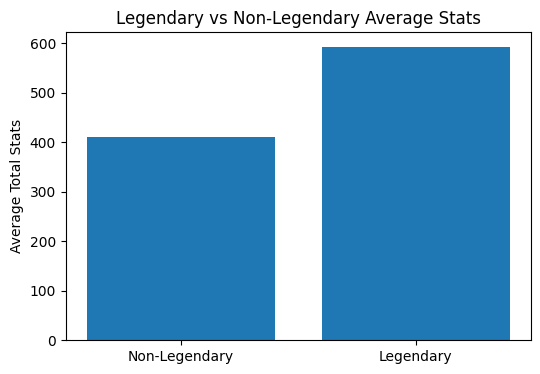

In [21]:
plt.figure(figsize=(6,4))
plt.bar(['Non-Legendary','Legendary'], legendary_means)
plt.ylabel("Average Total Stats")
plt.title("Legendary vs Non-Legendary Average Stats")
plt.savefig('../data/legvsnonleg.png', dpi=300, bbox_inches='tight')
plt.show()

## Dual-Type Analysis

In [22]:
# Whether Pokémon has two types
df['is_dual_type'] = df['type2'].apply(lambda x: x != "None" and pd.notna(x))

df[['name', 'type1', 'type2', 'is_dual_type']].head()

,name,type1,type2,is_dual_type
0,Bulbasaur,grass,poison,True
1,Ivysaur,grass,poison,True
2,Venusaur,grass,poison,True
3,Charmander,fire,NaN,False
4,Charmeleon,fire,NaN,False


### Dual vs. Single Type

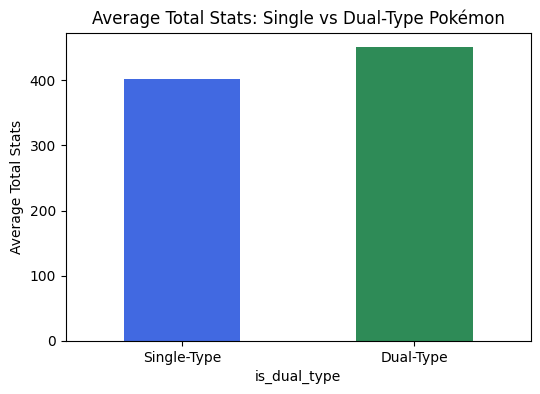

In [23]:
dual_vs_single = df.groupby('is_dual_type')['total_stats'].mean()
dual_vs_single

plt.figure(figsize=(6,4))
dual_vs_single.plot(kind='bar', color=['royalblue','seagreen'])

plt.xticks([0,1], ['Single-Type', 'Dual-Type'], rotation=0)
plt.ylabel("Average Total Stats")
plt.title("Average Total Stats: Single vs Dual-Type Pokémon")

plt.savefig('../data/dual_vs_single_bar.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\anton\AppData\Local\Temp\ipykernel_39628\119262260.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_dual_type', y='total_stats', data=df, palette=['royalblue','seagreen'])


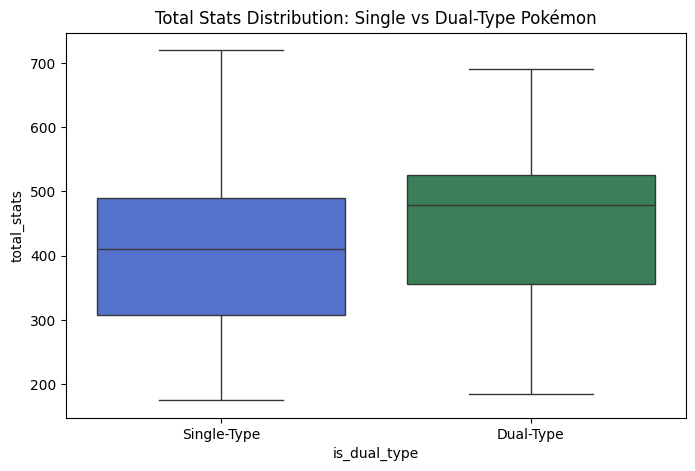

In [24]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.boxplot(x='is_dual_type', y='total_stats', data=df, palette=['royalblue','seagreen'])

plt.xticks([0,1], ['Single-Type','Dual-Type'])
plt.title("Total Stats Distribution: Single vs Dual-Type Pokémon")

plt.savefig('../data/dual_vs_single_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

### Compute Average Stats by Dual-Type Combination

In [25]:
# Create a combined "type_pair" column
df['type_pair'] = df.apply(
    lambda row: f"{row['type1']}/{row['type2']}" if row['is_dual_type'] else row['type1'],
    axis=1
)

type_pair_means = df.groupby('type_pair')['total_stats'].mean().sort_values(ascending=False)
print(type_pair_means.head(10))
print(type_pair_means.tail(10))

type_pair
dragon/electric    680.0
dragon/fire        680.0
ghost/dragon       680.0
psychic/steel      680.0
fighting/dragon    670.0
psychic/ghost      640.0
steel/dragon       605.0
dragon/psychic     600.0
fire/steel         600.0
fire/water         600.0
Name: total_stats, dtype: float64
type_pair
water/grass         346.666667
fighting/psychic    345.000000
bug/water           343.000000
bug/poison          335.454545
poison/bug          330.000000
ice/bug             330.000000
bug                 285.173913
normal/fairy        276.250000
bug/ground          266.000000
bug/ghost           236.000000
Name: total_stats, dtype: float64


### Strongest Dual-Type Combinations

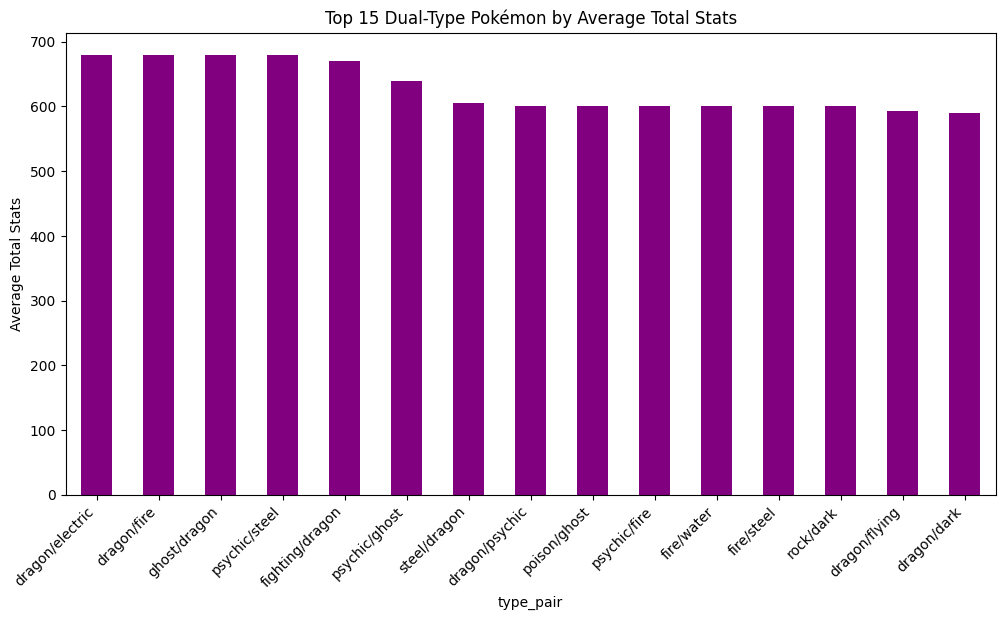

In [26]:
# Only dual types
dual_only = df[df['is_dual_type']]

dual_pair_means = dual_only.groupby('type_pair')['total_stats'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
dual_pair_means[:15].plot(kind='bar', color='purple')

plt.xticks(rotation=45, ha='right')
plt.ylabel("Average Total Stats")
plt.title("Top 15 Dual-Type Pokémon by Average Total Stats")

plt.savefig('../data/top_dual_types.png', dpi=300, bbox_inches='tight')
plt.show()

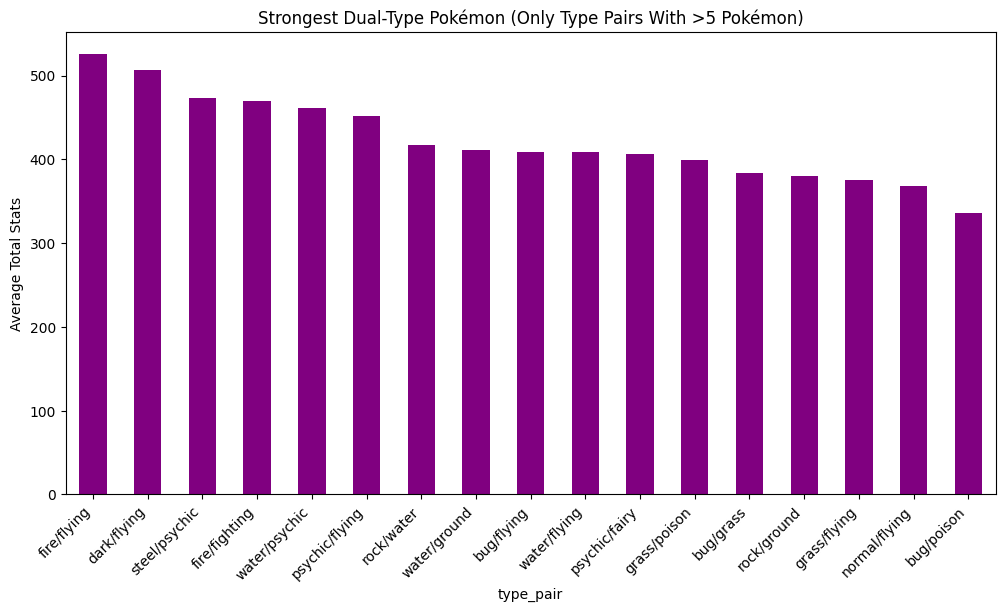

In [29]:
# Only dual-type Pokémon
dual_only = df[df['is_dual_type']]

# Count occurrences of each type pair
pair_counts = dual_only['type_pair'].value_counts()

# Keep only type pairs with > 3 Pokémon
valid_pairs = pair_counts[pair_counts > 5].index

filtered_duals = dual_only[dual_only['type_pair'].isin(valid_pairs)]

# Compute mean stats for these filtered pairs
filtered_means = (
    filtered_duals.groupby('type_pair')['total_stats']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12,6))
filtered_means.plot(kind='bar', color='purple')

plt.title("Strongest Dual-Type Pokémon (Only Type Pairs With >5 Pokémon)")
plt.ylabel("Average Total Stats")
plt.xticks(rotation=45, ha='right')

plt.savefig('../data/top_dual_types_filtered.png', 
            dpi=300, bbox_inches='tight')
plt.show()